In [7]:
import re
import os
import string
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  # Importing the stopwords module

import matplotlib.pyplot as plt
from nltk.util import bigrams



nltk.download('punkt')  # Download the necessary datasets
nltk.download('stopwords')
print(os.getcwd())

/Users/log/Github/IMDb-NLP


[nltk_data] Downloading package punkt to /Users/log/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/log/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def process_text_files(folder_path):
    # Loop through all the items in the directory
    for file_name in os.listdir(folder_path):
        # Check for .txt files
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            # Open the text file
            with open(file_path, 'r') as file:
                text = file.read()
            # Convert text to lowercase
            text = text.lower()
            # Remove punctuation using str.translate
            text = text.translate(str.maketrans('', '', string.punctuation))
            # Write the modified text back to the file
            with open(file_path, 'w') as file:
                file.write(text)
            print(f"Processed file: {file_name}")




In [22]:
stop_words = set(stopwords.words('english')) | {'br'}  # Adding 'br' to stopwords and like

pos_bigrams = Counter()
neg_bigrams = Counter()

pos_directory = './aclImdb/train/pos'
neg_directory = './aclImdb/train/neg'

In [23]:
# Function to process each file
def process_file_for_bigrams(filepath, bigram_counter):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read().lower()
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Assuming you've filtered tokens
        bigram_list = list(bigrams(filtered_tokens))
        bigram_counter.update([' '.join(bigram) for bigram in bigram_list])
        
for filename in os.listdir(pos_directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(pos_directory, filename)
        process_file_for_bigrams(filepath, pos_bigrams)

# Process all files in the negative directory for bi-grams
for filename in os.listdir(neg_directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(neg_directory, filename)
        process_file_for_bigrams(filepath, neg_bigrams)
        
print(len(pos_bigrams))

1036547


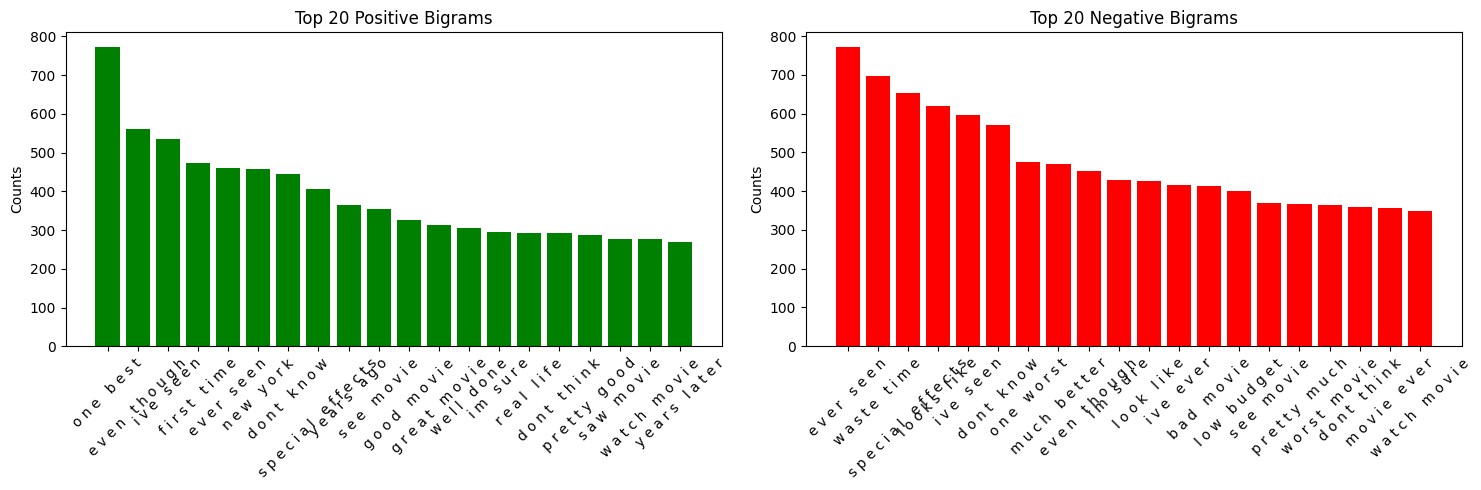

In [25]:
# Get the most common bigrams
top_pos_bigrams = pos_bigrams.most_common(20)
top_neg_bigrams = neg_bigrams.most_common(20)

# Unpack the bigrams and their counts
pos_bigram_tuples, pos_counts = zip(*top_pos_bigrams)
neg_bigram_tuples, neg_counts = zip(*top_neg_bigrams)

# Convert the bigram tuples into strings for plotting
pos_bigrams_str = [' '.join(bigram) for bigram in pos_bigram_tuples]
neg_bigrams_str = [' '.join(bigram) for bigram in neg_bigram_tuples]

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns for two bar charts

# Plot positive bigram counts
axs[0].bar(pos_bigrams_str, pos_counts, color='green')
axs[0].set_title('Top 20 Positive Bigrams')
axs[0].set_ylabel('Counts')
axs[0].tick_params(axis='x', rotation=45)

# Plot negative bigram counts
axs[1].bar(neg_bigrams_str, neg_counts, color='red')
axs[1].set_title('Top 20 Negative Bigrams')
axs[1].set_ylabel('Counts')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
num_unique_pos_bigrams = len(pos_bigrams)
num_unique_neg_bigrams = len(neg_bigrams)

print(f"Number of unique words in positive reviews: {num_unique_pos_bigrams}")
print(f"Number of unique words in negative reviews: {num_unique_neg_bigrams}")


Number of unique words in positive reviews: 1036547
Number of unique words in negative reviews: 975656


In [88]:
total_pos_bigrams = sum(pos_bigrams.values())
total_neg_bigrams = sum(neg_bigrams.values())

# Step 2: Calculate normalized differences and ratios for each bigram
polarized_differences = {}
bigram_ratios = {}

all_bigrams = set(pos_bigrams.keys()) | set(neg_bigrams.keys())

for bg in all_bigrams:
    # probably should normalize this in the future to avoid issues where more pos reviews biases towards positive reviews but idk
    pos_freq = pos_bigrams.get(bg, 0)
    neg_freq = neg_bigrams.get(bg, 0)
    
    # Calculate the absolute difference in normalized frequencies
    difference = abs(pos_freq - neg_freq)
    # difference = neg_freq - pos_freq
    polarized_differences[bg] = difference
    
    # Calculate the ratio of frequencies, avoiding division by zero
    # ratio = (pos_freq / neg_freq) if neg_freq > 0 else float('inf')
    # bigram_ratios[bg] = ratio

polarized_bigrams = {bigram: diff for bigram, diff in polarized_differences.items() if diff > 1}

# Step 3: Sort bigrams by their significance (difference in normalized frequencies)
sorted_significant_bigrams = sorted(polarized_bigrams.items(), key=lambda item: item[1], reverse=False)

In [84]:
for bg, diff in sorted_significant_bigrams[:50]:
    print(f"{bg}: {diff}")

gives film: 21
absolutely hilarious: 21
white guy: 21
high quality: 21
ever got: 21
totally wasted: 21
completely wasted: 21
two years: 21
entire family: 21
excellent script: 21
family life: 21
go rent: 21
find funny: 21
older man: 21
get better: 21
emma roberts: 21
film fails: 21
painfully obvious: 21
sent back: 21
fun watch: 21
decent movie: 21
truly bad: 21
title brazil: 21
know bad: 21
simply awful: 21
going get: 21
one redeeming: 21
friends alienate: 21
bad cant: 21
tom berenger: 21
global warming: 21
chris cooper: 21
singin rain: 21
dont say: 21
get killed: 21
simply didnt: 21
bad swim: 21
though may: 21
well told: 21
one avoid: 21
thought great: 21
brings back: 21
later film: 21
thinks hes: 21
steaming pile: 21
little slow: 21
every level: 21
bargain bin: 21
movie basically: 21
attempts humor: 21


In [89]:
import os

def read_texts_from_directory(directory_path):
    texts = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.txt'):
            with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
    return texts

# Assuming you have two directories containing positive and negative reviews respectively
positive_reviews = read_texts_from_directory('./aclImdb/train/pos')
negative_reviews = read_texts_from_directory('./aclImdb/train/neg')
reviews = positive_reviews + negative_reviews

In [90]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



# Assuming `polarized_words` is your dictionary of polarized words
custom_vocabulary = list(polarized_bigrams.keys())
# Assuming `custom_vocabulary` is a list of your polarized bigrams as strings
# Initialize TfidfVectorizer with your custom vocabulary
tfidf_vectorizer = TfidfVectorizer(vocabulary=custom_vocabulary, ngram_range=(2,2))

# Initialize CountVectorizer with your custom vocabulary
# vectorizer = CountVectorizer(vocabulary=custom_vocabulary, analyzer='word', ngram_range=(2,2))

# Fit the vectorizer to your data and transform your text data into numerical vectors
X = tfidf_vectorizer.fit_transform(reviews)


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize and train your model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8962
